<a href="https://colab.research.google.com/github/Obreintelly/dhs-analysis/blob/main/DHS_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Relevant Libraries**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading & Checking the Data**

In [7]:
# Loading our dataset

dhs_df =  pd.read_csv('dhsdataset.csv')

In [8]:
dt = pd.read_stata('file1.dta')

dt.head()

,v000,agegroup,residence,wealthquint,v312,v327,weight
0,BD6,25-29,rural,poorest,injections,government home/community delivery,6.88837
1,BD6,40-44,rural,middle,not using,NaN,6.88837
2,BD6,35-39,rural,poorest,pill,government clinic/pharmacy,6.88837
3,BD6,15-19,rural,poorest,periodic abstinence,NaN,6.88837
4,BD6,20-24,rural,poorest,not using,NaN,6.88837


In [9]:
# Getting a preview of the first 5 rows

dhs_df.head(5)

,v000,agegroup,residence,wealthquint,v312,v327,weight
0,BD6,25-29,rural,poorest,injections,government home/community delivery,6.88837
1,BD6,40-44,rural,middle,not using,NaN,6.88837
2,BD6,35-39,rural,poorest,pill,government clinic/pharmacy,6.88837
3,BD6,15-19,rural,poorest,periodic abstinence,NaN,6.88837
4,BD6,20-24,rural,poorest,not using,NaN,6.88837


In [10]:
# Getting a preview of the last 5 rows

dhs_df.tail(5)

,v000,agegroup,residence,wealthquint,v312,v327,weight
34235,ZM6,20-24,rural,richest,not using,NaN,8.55505
34236,ZM6,30-34,rural,richest,not using,NaN,8.55505
34237,ZM6,25-29,rural,richest,not using,NaN,8.55505
34238,ZM6,20-24,rural,richest,not using,NaN,8.55505
34239,ZM6,40-44,rural,richest,not using,NaN,8.55505


In [11]:
#Rows and columns in the dataset
#
print('Our Dataset has: {} Rows, {} Columns'.format(*dhs_df.shape))

Our Dataset has: 34240 Rows, 7 Columns


In [12]:
#Columns in the Dataset
dhs_df.columns

Index(['v000', 'agegroup', 'residence', 'wealthquint', 'v312', 'v327',
       'weight'],
      dtype='object')

In [13]:
#Snapshot of unique values in the dataset columns
dhs_df.nunique()

v000              2
agegroup          7
residence         2
wealthquint       5
v312             12
v327              8
weight         1169
dtype: int64

# Checking for Unique Values Per column

In [14]:
dhs_df.v000.unique()

array(['BD6', 'ZM6'], dtype=object)

In [15]:
dhs_df.agegroup.unique()

array(['25-29', '40-44', '35-39', '15-19', '20-24', '30-34', '45-49'],
      dtype=object)

In [16]:
dhs_df.residence.unique()

array(['rural', 'urban'], dtype=object)

In [17]:
dhs_df.wealthquint.unique()

array(['poorest', 'middle', 'poorer', 'richer', 'richest'], dtype=object)

In [18]:
dhs_df.v312.unique()

array(['injections', 'not using', 'pill', 'periodic abstinence', 'condom',
       'withdrawal', 'female sterilization', 'implants/norplant',
       'male sterilization', 'other', 'iud',
       'lactational amenorrhea (lam)'], dtype=object)

In [19]:
dhs_df.v327.unique()

array(['government home/community delivery', nan,
       'government clinic/pharmacy', 'private clinic/delivery',
       'shop, church, friend', 'ngo', 'other', "don't know", 'pharmacy'],
      dtype=object)

In [20]:
dhs_df.weight.unique()

array([ 6.88837  ,  4.2066398,  6.4077902, ...,  9.2582102, 24.44208  ,
        8.5550499])

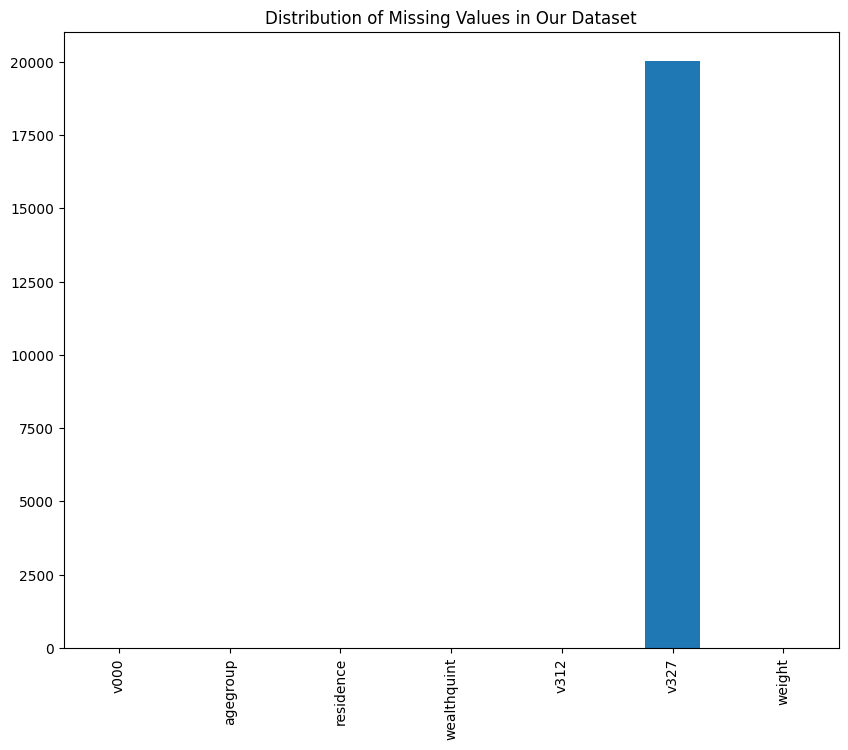

In [21]:
#Checking for missing values
plt.figure(figsize=(10, 8), dpi=100)
dhs_df.isna().sum().plot(kind='bar')
plt.title('Distribution of Missing Values in Our Dataset');

In [22]:
#To make a decision on how to address the missing values in Our dataset,
#determining their percentages will be an important first step.


#Deriving percentage of missing values
100 *dhs_df.isna().sum()/len(dhs_df)

#Creating a function to help us derive the percentages

def percent_missing(dhs_df):
  percent_na = 100 *dhs_df.isna().sum()/len(dhs_df)
  percent_na = percent_na[percent_na>0].sort_values()

  return percent_na

percent_na = percent_missing(dhs_df)

percent_na

v327    58.49007
dtype: float64

In [23]:
#Almost 60% of the v327 column is missing. We still have more than 14000 data points that might provide insights in this column.
#Instead of dropping it, we will replace the missing values to preserve the data insights.

In [24]:
dhs_df.v327 = dhs_df.v327.fillna('unavailable')

In [25]:
dhs_df.v327.unique()

array(['government home/community delivery', 'unavailable',
       'government clinic/pharmacy', 'private clinic/delivery',
       'shop, church, friend', 'ngo', 'other', "don't know", 'pharmacy'],
      dtype=object)

In [26]:

#Checking whether we still have missing values

dhs_df.isna().any().sum()

0

In [27]:

#We check for duplicates in Our dataset

dhs_df.duplicated().any().sum()

1

In [28]:

#Dropping the Duplicate
dhs_df = dhs_df.drop_duplicates()


#Confirming we do not have anymore duplicates

dhs_df.duplicated().any()


False

In [29]:
#Checking for Outliers

dhs_df.describe().T


,count,mean,std,min,25%,50%,75%,max
weight,25760.0,10.013487,8.099745,0.78695,4.99958,8.15087,12.67749,141.94492


# **Saving the Clean Dataset**

In [30]:

#Saving Our Clean Dataset
dhs_df.to_csv('hypo.csv', index=False)

df= pd.read_csv('hypo.csv')

# **Exploratory Analysis**

In [31]:
df.head()

,v000,agegroup,residence,wealthquint,v312,v327,weight
0,BD6,25-29,rural,poorest,injections,government home/community delivery,6.88837
1,BD6,40-44,rural,middle,not using,unavailable,6.88837
2,BD6,35-39,rural,poorest,pill,government clinic/pharmacy,6.88837
3,BD6,15-19,rural,poorest,periodic abstinence,unavailable,6.88837
4,BD6,20-24,rural,poorest,not using,unavailable,6.88837


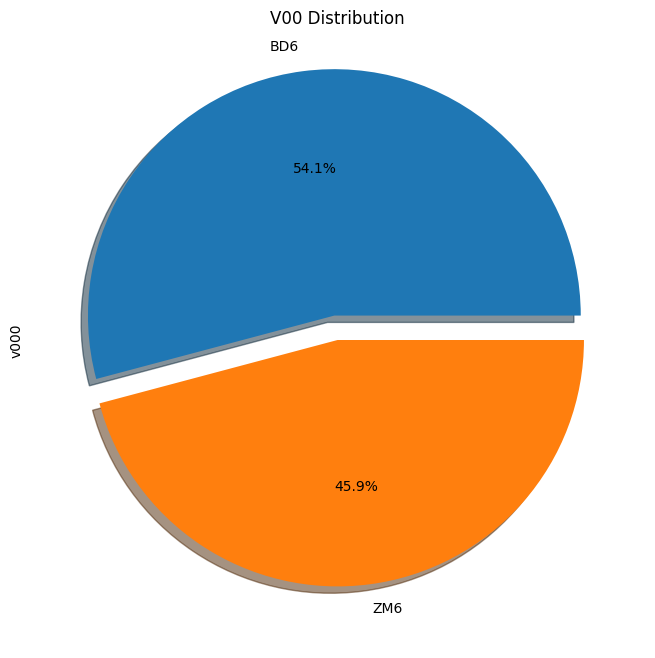

In [43]:
#Distribution of Residence in the dataset
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.v000.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('V00 Distribution');

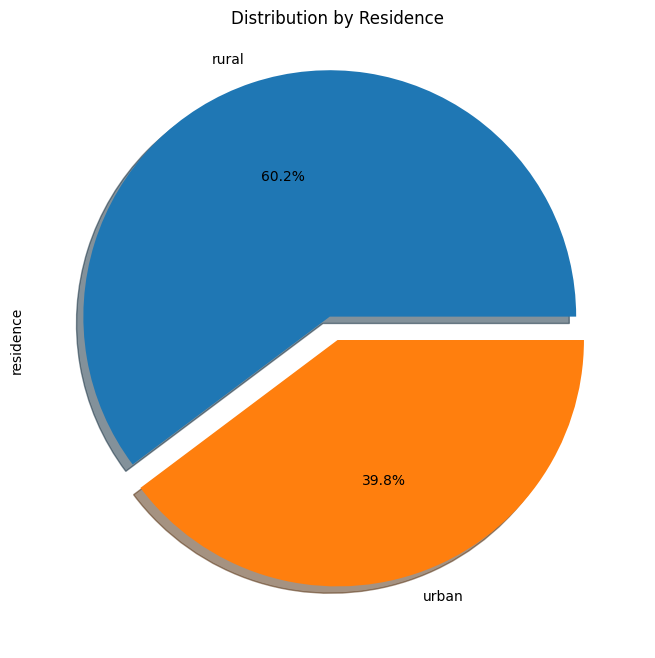

In [32]:
#Distribution of Residence in the dataset
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.residence.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution by Residence');

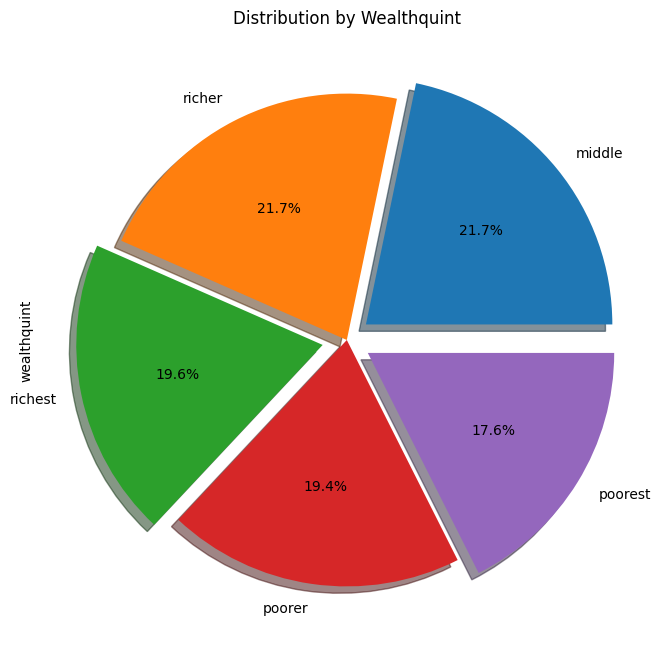

In [44]:
#Distribution of Wealthquaint in the dataset
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0, 0.1, 0, 0.1)
df.wealthquint.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution by Wealthquint');

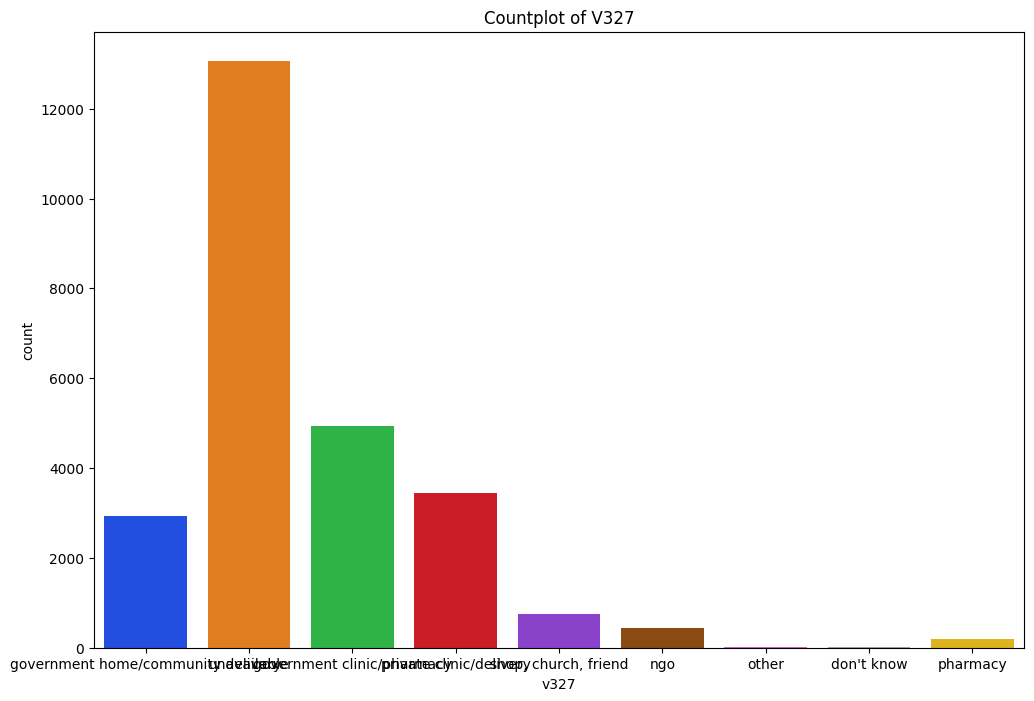

In [48]:
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=df, x='v327', palette='bright')
plt.title('Countplot of V327');

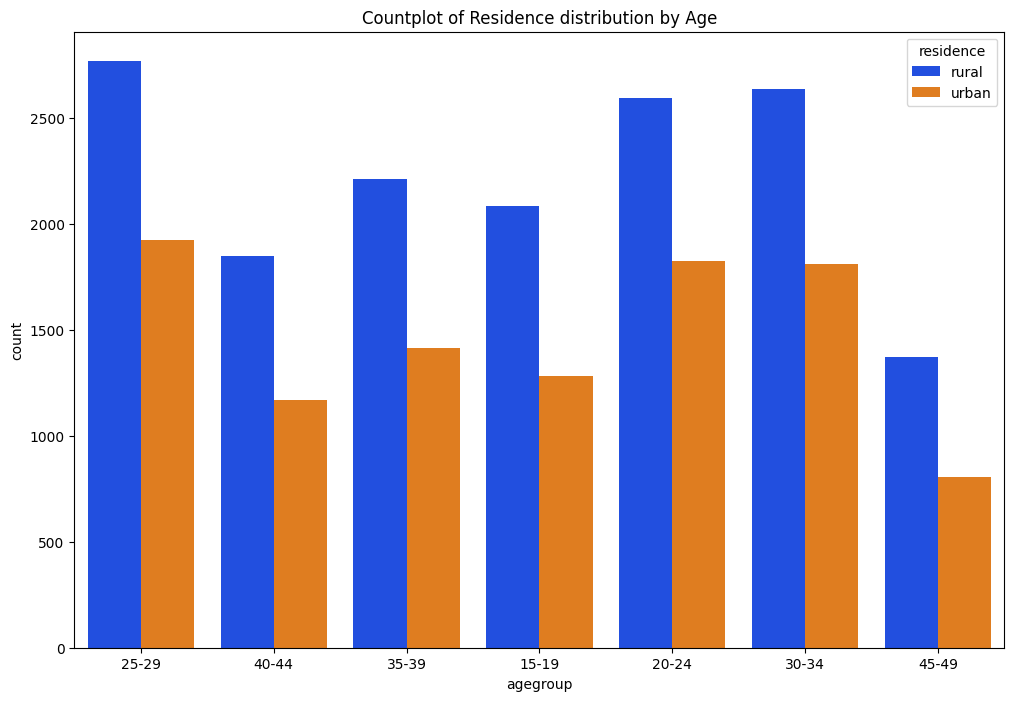

In [51]:
#DIstribution of Agegroup by Residence
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=df, x='agegroup', hue='residence', palette='bright')
plt.title('Countplot of Residence distribution by Age');


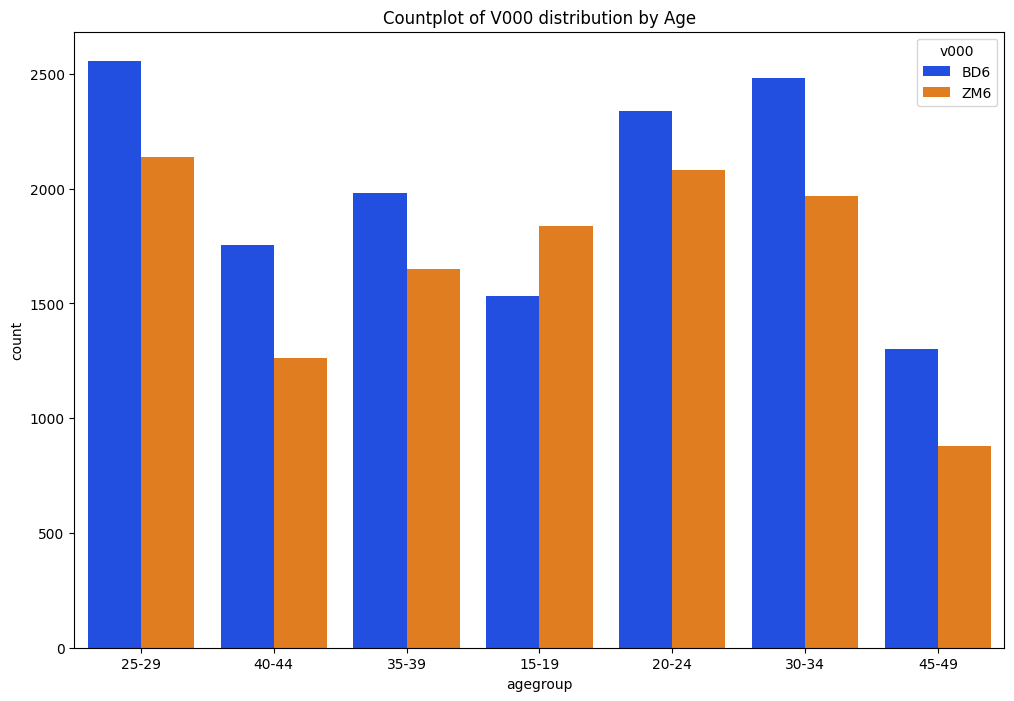

In [52]:
#DIstribution of V000 by Age Group
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=df, x='agegroup', hue='v000', palette='bright')
plt.title('Countplot of V000 distribution by Age');

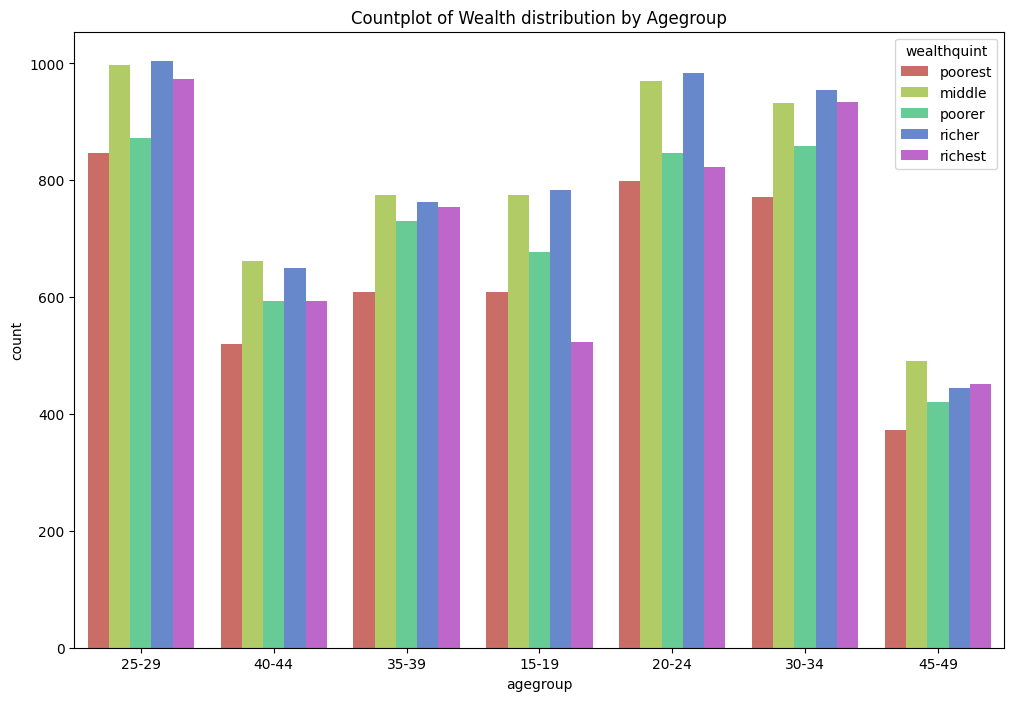

In [55]:
#DIstribution of Wealth by Age Group
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=df, x='agegroup', hue='wealthquint', palette='hls')
plt.title('Countplot of Wealth distribution by Agegroup');

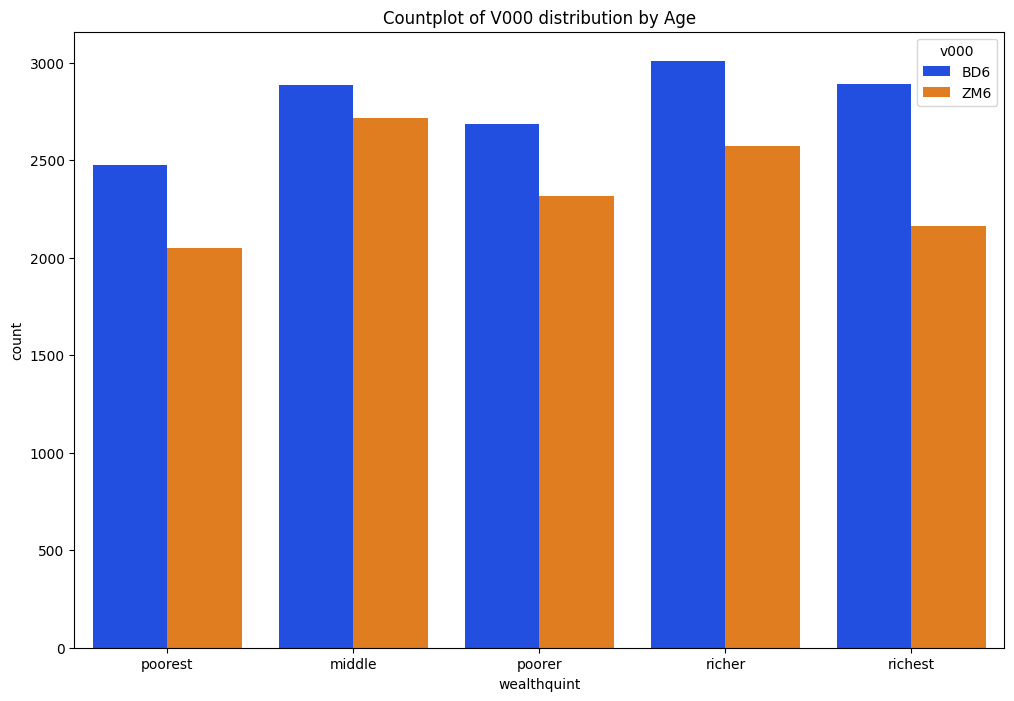

In [56]:
#DIstribution of v000 by wealth
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=df, x='wealthquint', hue='v000', palette='bright')
plt.title('Countplot of V000 distribution by Age');

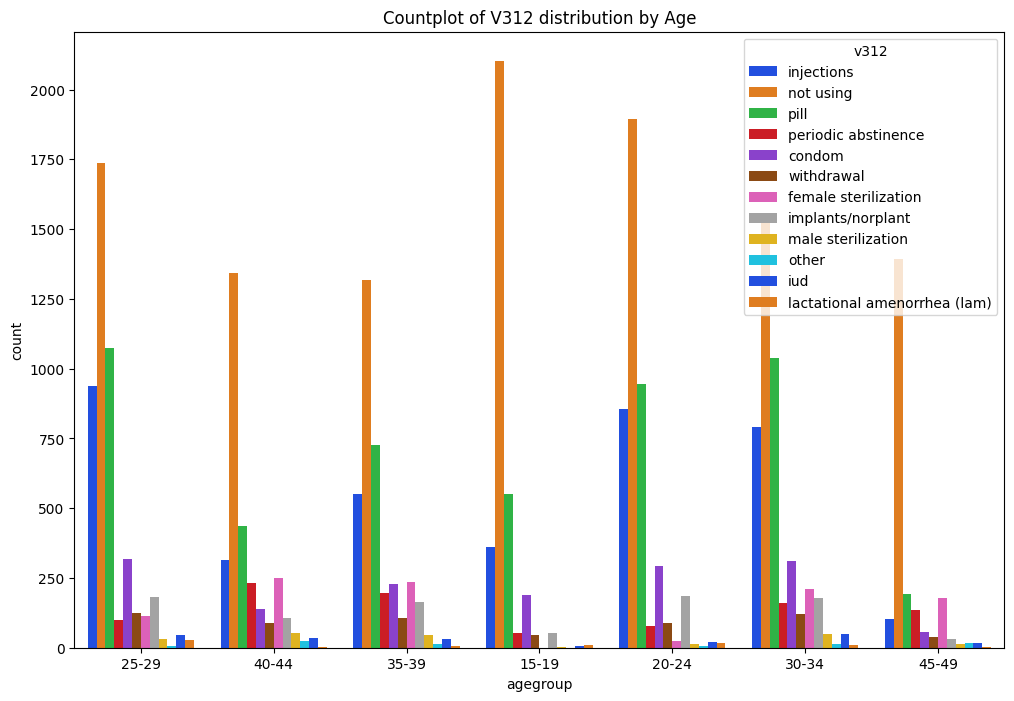

In [58]:
#DIstribution of V312 by Age Group
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=df, x='agegroup', hue='v312', palette='bright')
plt.title('Countplot of V312 distribution by Age');

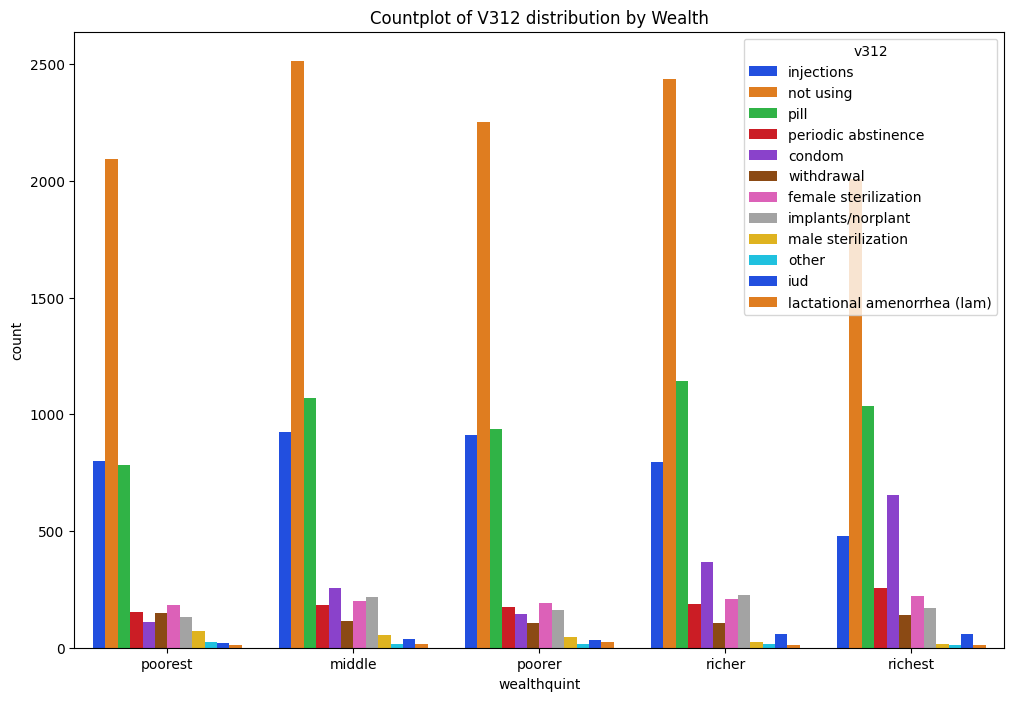

In [62]:
#DIstribution of V312 by Wealth
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=df, x='wealthquint', hue='v312', palette='bright')
plt.title('Countplot of V312 distribution by Wealth');

In [49]:
df.head()

,v000,agegroup,residence,wealthquint,v312,v327,weight
0,BD6,25-29,rural,poorest,injections,government home/community delivery,6.88837
1,BD6,40-44,rural,middle,not using,unavailable,6.88837
2,BD6,35-39,rural,poorest,pill,government clinic/pharmacy,6.88837
3,BD6,15-19,rural,poorest,periodic abstinence,unavailable,6.88837
4,BD6,20-24,rural,poorest,not using,unavailable,6.88837


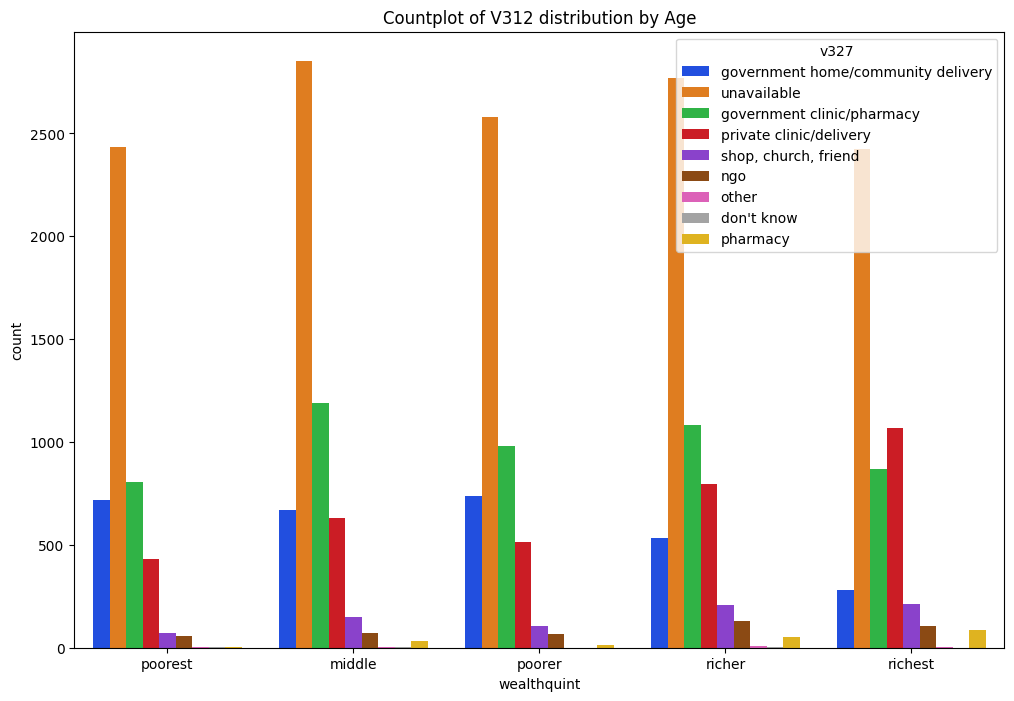

In [63]:
#DIstribution of V327 by Wealth
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=df, x='wealthquint', hue='v327', palette='bright')
plt.title('Countplot of V327 distribution by wealth');

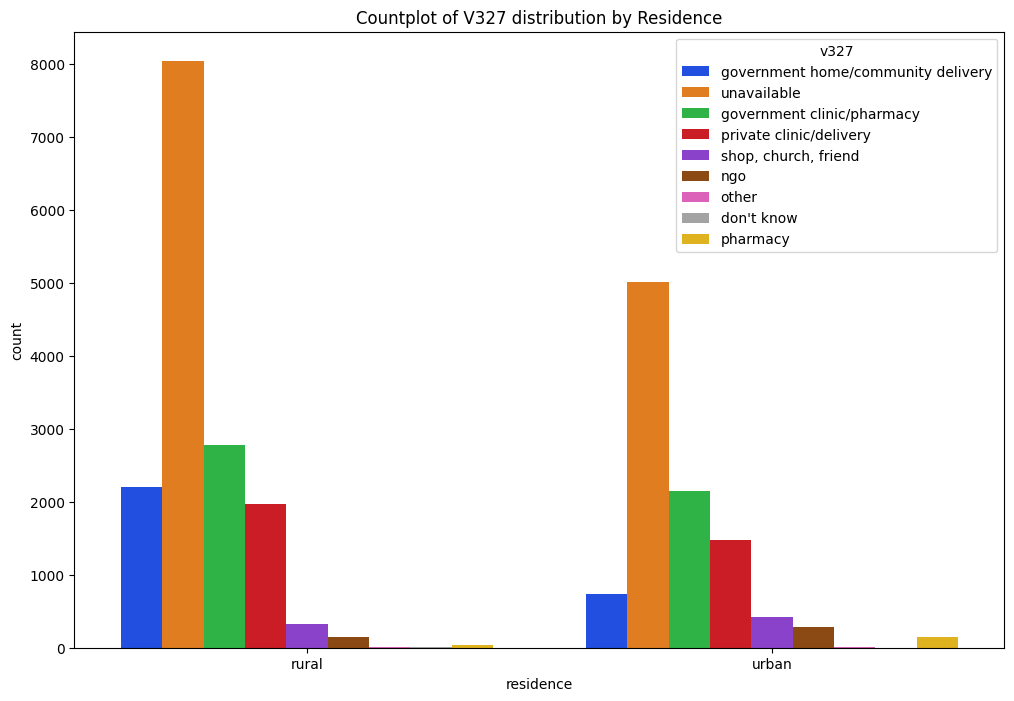

In [64]:
#DIstribution of V327 by Residemce
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=df, x='residence', hue='v327', palette='bright')
plt.title('Countplot of V327 distribution by Residence');

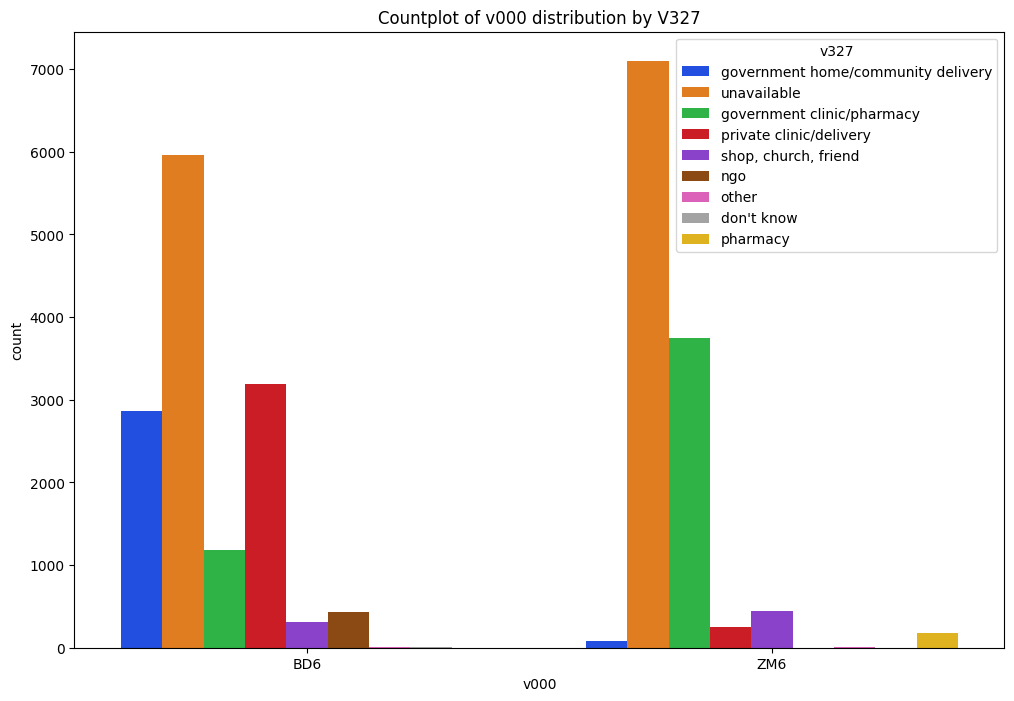

In [66]:
#DIstribution of V312 by V000
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=df, x='v000', hue='v327', palette='bright')
plt.title('Countplot of v000 distribution by V327');